## **Introduction**
#### This document was developed by Mr. Emanuel Y. Gloria and Ms. Viel Celis as one of the academic requirement/assignment for the CMSC 210: Artificial Intelligence course for the Diploma in Computer Science degree.

#### *Please note that the used in this assignment was acquired via survey by the aforementioned students.*

###**Data Preprocessing & Preliminary Data Mining**

#### **Load and Check Data**

In [ ]:
pip install --upgrade pingouin

In [ ]:
pip install kneed # To install only knee-detection algorithm

In [ ]:
pip install kneed[plot] # To also install plotting functions for quick visualizations

In [ ]:
# Warning: The data was imported from my Google Drive and this might not work
# for others who does not have my UP Mail credentials. Suggest to run the scripts
# on your local machine and create a working directory with the CSV file in it.

# Import the libraries to load the survey data from Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')

# Set the search parameters
filename = 'Gloria-Celis_Use of Telehealth and Digital Health Tools.csv'
search_path = '/content/drive/My Drive'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

# Relevant packages for the analysis
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2
from kneed import DataGenerator, KneeLocator
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Review data
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,Email Address,Name (Optional),Age,Sex,Current Residence (City),Occupation (based on PSA's 2012 PSOC by Sub-major group),1. How would you describe your overall utilization of digital health services and tools in managing your health and wellness?,2. Which telehealth service provider have you used most frequently for consultations?,3. Which health app(s) do you regularly use for managing your health and wellness?,...,"8. On average, how many hours per day do you spend using health applications on your devices?","9. On a scale of 1 to 5 (5 being the highest level of trust), how much do you trust telehealth services for your healthcare needs?","10. Please rate your digital health literacy on a scale from 0 to 100, where 0 represents no knowledge or literacy and 100 represents the highest level of digital health literacy.",11. How would you rate the overall effectiveness of telehealth services you’ve experienced?,12. To what extent are you concerned about the privacy of your health data when using telehealth services?,13. Have you noticed any improvements in your health as a result of using digital health tools and services?,14. How would you describe the accessibility of telehealth services in your experience?,15. Please select the reasons for which you use or would use telehealth services? (Select all that apply)\n,"16. Please select the barriers that that have hindered your adoption of digital health products, tools, and services.",17. Please select the digital health tools you prefer to use? (Select all that apply)\n
0,9/28/2023 19:51:43,vlcelis@up.edu.ph,NaN,18-25,Female,Las Pinas,Others,Moderate,KonsultaMd,None,...,0.0,3,80,Good,Somewhat concerned,Significant,Good,Avoiding In-Person Visit,Lack of internet,Mobile Phones
1,9/29/2023 12:36:03,kfyao1@up.edu.ph,NaN,26-30,Female,Mandaluyong,Information and Communication Technology Profe...,Low,None of the above,None,...,0.0,3,60,Good,Concerned,Not Applicable,Adequate,"Consolation Convenience, Time Saving","Privacy concerns, Limited awareness","Mobile Phones, Video Consultation, Wearable De..."
2,9/29/2023 13:07:46,jvincecanseco@gmail.com,John Vincent Canseco,26-30,Male,Manila,Information and Communication Technology Profe...,High,None of the above,Maxicare,...,1.0,3,50,Good,Note concerned,Significant,Good,"Time Saving, Avoiding In-Person Visit",Limited awareness,Mobile Phones
3,9/29/2023 13:12:15,icgozun@pchrd.dost.gov.ph,NaN,26-30,Female,Taguig,Others,Moderate,None of the above,NowServing,...,1.0,4,70,Good,Somewhat concerned,Moderate,Adequate,"Consolation Convenience, Time Saving",Limited awareness,"Mobile Phones, Wearable Devices"
4,9/29/2023 13:40:25,mikemuin@gmail.com,NaN,41- above,Male,Pasig,Health Professionals,Low,None of the above,None,...,1.0,3,100,Poor,Very concerned,Minor,Good,"Time Saving, Avoiding In-Person Visit","Lack of internet, Limited awareness",Mobile Phones


In [ ]:
# Describe data
df.describe()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,7. How often do you have telemedicine consultation in a year? Please enter the approximate number.,"8. On average, how many hours per day do you spend using health applications on your devices?","9. On a scale of 1 to 5 (5 being the highest level of trust), how much do you trust telehealth services for your healthcare needs?","10. Please rate your digital health literacy on a scale from 0 to 100, where 0 represents no knowledge or literacy and 100 represents the highest level of digital health literacy."
count,57.000000,57.000000,57.000000,57.000000
mean,1.280702,1.235088,3.298246,54.473684
std,1.997806,4.065995,0.885698,32.771452
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,30.000000
50%,1.000000,0.000000,3.000000,60.000000
75%,2.000000,1.000000,4.000000,80.000000
max,12.000000,24.000000,5.000000,100.000000


In [ ]:
# Check data types
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp                                                                                                                                                                                                       object
Email Address                                                                                                                                                                                                   object
Name (Optional)                                                                                                                                                                                                 object
Age                                                                                                                                                                                                             object
Sex                                                                                                                                         

#### **Data Pre-processing Task**

In [ ]:
# Step 1: Remove the following columns: Timestamp, Email Address, Name (Optional)
df = df.iloc[:,3:]

# Step 2: Rename column names
df.columns = ["age","sex","residence","occupation","q1","q2","q3","q4","q5","q6","q7","q8","q9","q10","q11","q12","q13","q14","q15","q16","q17"]

#Step 3: Replace mislabled and misspelled data entries
df["q5"].replace({'Not Applicable. (If you answered "No" in Q4.)':"Not applicable"}, inplace = True)
df["q12"].replace({"Note concerned":"Not concerned"}, inplace = True)

#Step 4: Convert nominal data from columns Q1 and Q11-14 to categorical
# and remap categort orders
df["q1"] = df["q1"].astype("category")
df["q1"] = df["q1"].cat.reorder_categories(["Low", "Moderate", "High"])

df["q11"] = df["q11"].astype("category")
df["q11"] = df["q11"].cat.reorder_categories(["Not applicable","Poor", "Fair", "Good", "Excellent"])

df["q12"] = df["q12"].astype("category")
df["q12"] = df["q12"].cat.reorder_categories(["Not concerned", "Somewhat concerned", "Concerned","Very concerned"])

df["q13"] = df["q13"].astype("category")
df["q13"] = df["q13"].cat.reorder_categories(["Not Applicable","None", "Minor", "Moderate", "Significant"])

df["q14"] = df["q14"].astype("category")
df["q14"] = df["q14"].cat.reorder_categories(["Limited", "Adequate", "Good", "Excellent"])

#Step 5: Remove anomalies in the numerica variables
# Remove the two outliers in q8 - respondents using their health apps. 20 and 24 on avg. a day
df["q8"].replace({20: np.nan,24: np.nan}, inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **Correlation Analysis among Numeric Variables**
###### Telemed Frequency (q7) x Avg. App Usage (q8) x Trust Rating (q9) x Digital Health Literacy (q10)


In [ ]:
#PEARSON CORRELATION (PARAMETRIC)
pearson_corr = df[["q7","q8","q9","q10"]].corr(method='pearson')

#Fill diagonal and upper half with NaNs
pearson_mask = np.zeros_like(pearson_corr, dtype=bool)
pearson_mask[np.triu_indices_from(pearson_mask)] = True

#Print visual
pearson_corr [pearson_mask] = np.nan
(pearson_corr
.style
.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
.highlight_null(color='#f1f1f1')
.format(precision=2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,q7,q8,q9,q10
q7,nan,nan,nan,nan
q8,0.24,nan,nan,nan
q9,0.48,0.39,nan,nan
q10,0.22,0.39,0.41,nan


In [ ]:
df[["q7","q8","q9","q10"]].rcorr(method='pearson')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,q7,q8,q9,q10
q7,-,,***,
q8,0.241,-,**,**
q9,0.477,0.39,-,**
q10,0.224,0.389,0.415,-


In [ ]:
#SPEARMAN CORRELATION (NON-PARAMETRIC)
spearman_corr = df[["q7","q8","q9","q10"]].corr(method='spearman')

#Fill diagonal and upper half with NaNs
spearman_mask = np.zeros_like(spearman_corr, dtype=bool)
spearman_mask[np.triu_indices_from(spearman_mask)] = True

#Print visual
spearman_corr[spearman_mask] = np.nan
(spearman_corr
.style
.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
.highlight_null(color='#f1f1f1')
.format(precision=2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,q7,q8,q9,q10
q7,nan,nan,nan,nan
q8,0.44,nan,nan,nan
q9,0.44,0.43,nan,nan
q10,0.31,0.44,0.34,nan


In [ ]:
df[["q7","q8","q9","q10"]].rcorr(method='spearman')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,q7,q8,q9,q10
q7,-,***,***,*
q8,0.44,-,***,***
q9,0.444,0.434,-,*
q10,0.308,0.442,0.337,-


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


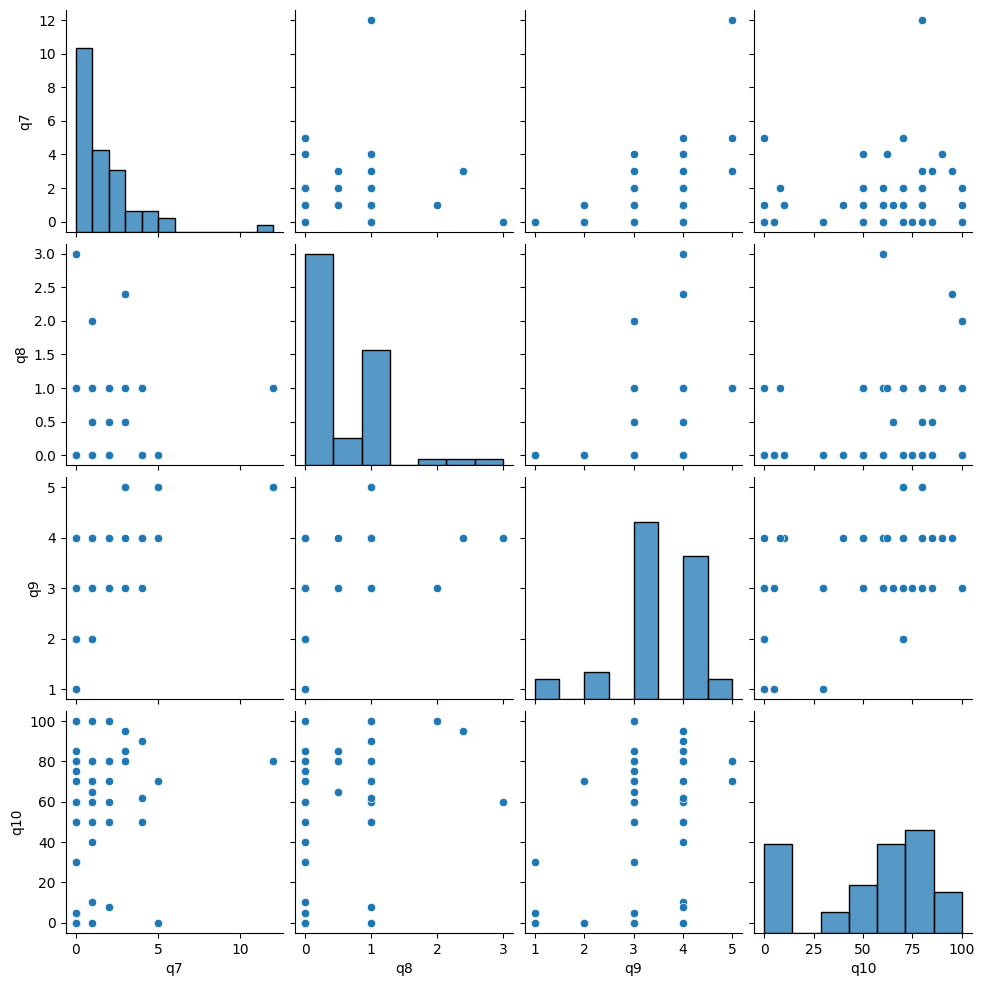

In [ ]:
# Create a default pairplot of all numeric variables
sns.pairplot(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='q7', ylabel='q9'>

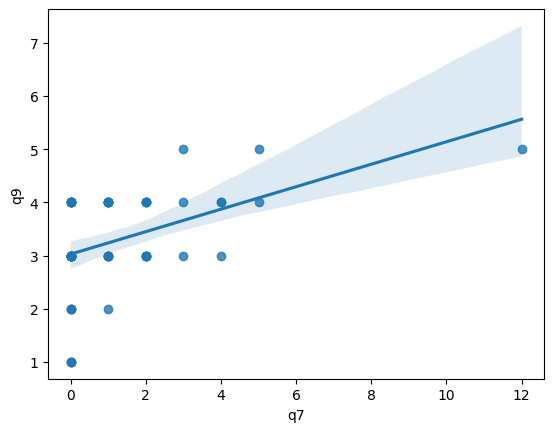

In [ ]:
# Create a plot for the pair with the highest correlation
sns.regplot(x="q7", y="q9", data=df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='q7', ylabel='q10'>

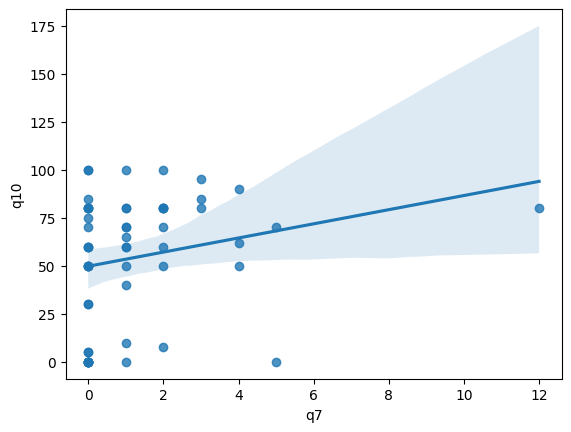

In [ ]:
# Create a plot for the pair with the lowest correlation
sns.regplot(x="q7", y="q10", data=df)

#### **Chi-Square Test between Telemedicine Use and Online Health Communications Membership**

In [ ]:
#CHI-SQUARE TEST
import scipy.stats as stats

cross_tab = pd.crosstab(df['q4'],df['q6'])
contingency_table = stats.chi2_contingency(cross_tab.values)
print(contingency_table)

# Cosstabulate and compute for the Observed Values and solve for the Expected Values
Observed_values = cross_tab.values
Expected_values = contingency_table[3]

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[21.78947368,  5.21052632],
       [24.21052632,  5.78947368]]))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Observed_values)

[[22  5]
 [24  6]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Expected_values)

[[21.78947368  5.21052632]
 [24.21052632  5.78947368]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the degrees of Freedom
alpha = 0.05
no_of_rows = len(cross_tab.iloc[0:2,0])
no_of_columns = len(cross_tab.iloc[0,0:2])
ddof = (no_of_rows-1)*(no_of_columns-1)

# Compute for the Chi-square Statistic
chi_sqr = sum([(o-e)**2./e for o,e in zip(Observed_values, Expected_values)])
chi_square_statistic = chi_sqr[0] + chi_sqr[1]

# Compute for the critical value and p-value
critical_value = chi2.ppf(q = 1-alpha, df = ddof)
p_value = 1-chi2.cdf(x = chi_square_statistic, df = ddof)

# Print results
print("Chi-square statistic: ", chi_square_statistic)
print("Critical value: ", critical_value)
print("p-value: ", p_value)
print("Significance level (alpha): ", alpha)
print("Degree of Freedom: ", ddof, "\n")

if chi_square_statistic >= critical_value:
  print("Decision with Chi Square Statistic >= Critical Value: ")
  print("Reject H0, There is a relationship between 2 categorical variables.\n")
else:
  print("Decision with Chi Square Statistic >= Critical Value: ")
  print("Fail to reject H0. No sufficient evidence to say that there is a relationship between the 2 categorical variables.\n")

if p_value <= alpha:
  print("Decision with P-value <= alpha: ")
  print("Reject H0, There is a relationship between 2 categorical variables.\n")
else:
  print("Decision with P-value <= alpha:")
  print("Fail to reject H0. No sufficient evidence to say that there is a relationship between the 2 categorical variables.\n")

Chi-square statistic:  0.020026350461132995
Critical value:  3.841458820694124
p-value:  0.8874635150406981
Significance level (alpha):  0.05
Degree of Freedom:  1 

Decision with Chi Square Statistic >= Critical Value: 
Fail to reject H0. No sufficient evidence to say that there is a relationship between the 2 categorical variables.

Decision with P-value <= alpha:
Fail to reject H0. No sufficient evidence to say that there is a relationship between the 2 categorical variables.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###**Association Rule Mining of all three Multi-valued Attributes**

In [ ]:
# Create a one hot encoded dataframe - QUESTION 15
df["q15"] = df["q15"].str.replace(" ","")                # Remove White Space
q15 = list(df["q15"].apply(lambda x:x.split(",") ))      # Transform into an array split by ","

a = TransactionEncoder()
a_data = a.fit(q15).transform(q15)
a.columns_ = ["Avoiding In-Person Visit", "Consultation Convenience", "During COVID", "I prefer in-person","Time Saving"]


q15_df = pd.DataFrame(a_data,columns=a.columns_)
q15_df = q15_df.replace(False, 0)
q15_df = q15_df.replace(True, 1)
q15_df = q15_df[q15_df["I prefer in-person"] != 1]      # Remove the row with "I prefer in-person"
q15_df = q15_df.drop("I prefer in-person", axis = 1)    # Drop the column "I prefer in-person"
q15_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Avoiding In-Person Visit,Consultation Convenience,During COVID,Time Saving
0,1,0,0,0
1,0,1,0,1
2,1,0,0,1
3,0,1,0,1
4,1,0,0,1
5,1,1,0,1
6,0,0,0,1
7,1,0,0,1
8,1,0,0,1
9,0,1,0,1


In [ ]:
# Set a threshold value for the support value = 0.2 - QUESTION 15
q15_dff = apriori(q15_df, min_support = 0.2, use_colnames = True, verbose = 1)
q15_dff

Processing 3 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.589286,(Avoiding In-Person Visit)
1,0.482143,(Consultation Convenience)
2,0.714286,(Time Saving)
3,0.250000,"(Consultation Convenience, Avoiding In-Person ..."
4,0.410714,"(Time Saving, Avoiding In-Person Visit)"
5,0.339286,"(Time Saving, Consultation Convenience)"
6,0.214286,"(Time Saving, Consultation Convenience, Avoidi..."


In [ ]:
# Use the Association rule function  - QUESTION 15
df_ar = association_rules(q15_dff, metric = "confidence", min_threshold = 0.6)
df_ar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Avoiding In-Person Visit),(Time Saving),0.589286,0.714286,0.410714,0.696970,0.975758,-0.010204,0.942857,-0.057041
1,(Consultation Convenience),(Time Saving),0.482143,0.714286,0.339286,0.703704,0.985185,-0.005102,0.964286,-0.028219
2,"(Time Saving, Consultation Convenience)",(Avoiding In-Person Visit),0.339286,0.589286,0.214286,0.631579,1.071770,0.014349,1.114796,0.101351
3,"(Consultation Convenience, Avoiding In-Person ...",(Time Saving),0.250000,0.714286,0.214286,0.857143,1.200000,0.035714,2.000000,0.222222


In [ ]:
# Create a one hot encoded dataframe - QUESTION 16
df["q16"] = df["q16"].str.replace(" ","")            # Remove White Space
q16 = df["q16"].dropna()                             # Remove NA values
q16 = list(q16.apply(lambda x:x.split(",") ))

b = TransactionEncoder()
b_data = b.fit(q16).transform(q16)
b.columns_ = ["Drop_1",
              "Afraid of Teleconsult",
              "Bad UI/UX",
              "Lack of Internet",
              "Limited Access due to subs",
              "Limited Awareness",
              "In Person Preference1",
              "Not a need",
              "In Person Preference2",
              "Privacy Concerns",
              "App Compatibility",
              "In Person Preference3",
              "Drop_2",
              "Drop_3",
              "Not accept HMO"]

q16_df = pd.DataFrame(b_data,columns=b.columns_)
q16_df = q16_df.replace(False, 0)
q16_df = q16_df.replace(True, 1)

# Remove unnecessary rows and drop columns
q16_df = q16_df[q16_df["Drop_1"] != 1]
q16_df = q16_df.drop("Drop_1", axis = 1)

q16_df = q16_df[q16_df["Drop_2"] != 1]
q16_df = q16_df.drop("Drop_2", axis = 1)

q16_df = q16_df[q16_df["Drop_3"] != 1]
q16_df = q16_df.drop("Drop_3", axis = 1)

# Combine similar columns and drop the original columns
q16_df["Limited Access"] = q16_df["Lack of Internet"] + q16_df["Limited Access due to subs"] + q16_df["Not accept HMO"]
q16_df["In Person Preference"] = q16_df["In Person Preference1"] + q16_df["In Person Preference2"] + q16_df["In Person Preference3"]
q16_df = q16_df.drop("In Person Preference1", axis = 1)
q16_df = q16_df.drop("In Person Preference2", axis = 1)
q16_df = q16_df.drop("In Person Preference3", axis = 1)
q16_df = q16_df.drop("Lack of Internet", axis = 1)
q16_df = q16_df.drop("Limited Access due to subs", axis = 1)
q16_df = q16_df.drop("Not accept HMO", axis = 1)
q16_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Afraid of Teleconsult,Bad UI/UX,Limited Awareness,Not a need,Privacy Concerns,App Compatibility,Limited Access,In Person Preference
0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,1,0
5,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0
9,0,0,1,0,0,0,0,0


In [ ]:
# Set a threshold value for the support value = 0.05 - QUESTION 16
q16_dff = apriori(q16_df, min_support = 0.05, use_colnames = True, verbose = 1)
q16_dff

Processing 3 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.648148,(Limited Awareness)
1,0.259259,(Privacy Concerns)
2,0.222222,(Limited Access)
3,0.055556,(In Person Preference)
4,0.092593,"(Limited Awareness, Privacy Concerns)"
5,0.092593,"(Limited Access, Limited Awareness)"
6,0.092593,"(Limited Access, Privacy Concerns)"
7,0.055556,"(Limited Access, Limited Awareness, Privacy Co..."


In [ ]:
# Use the Association rule function  - QUESTION 16
df_arr = association_rules(q16_dff, metric = "confidence", min_threshold = 0.6)
df_arr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Limited Access, Limited Awareness)",(Privacy Concerns),0.092593,0.259259,0.055556,0.6,2.314286,0.031550,1.851852,0.625850
1,"(Limited Access, Privacy Concerns)",(Limited Awareness),0.092593,0.648148,0.055556,0.6,0.925714,-0.004458,0.879630,-0.081250
2,"(Limited Awareness, Privacy Concerns)",(Limited Access),0.092593,0.222222,0.055556,0.6,2.700000,0.034979,1.944444,0.693878


In [ ]:
# Create a one hot encoded dataframe - QUESTION 17
df["q17"] = df["q17"].str.replace(" ","")            # Remove White Space
q17 = df["q17"].dropna()                             # Remove NA values
q17 = list(q17.apply(lambda x:x.split(",") ))

c = TransactionEncoder()
c_data = c.fit(q17).transform(q17)

q17_df = pd.DataFrame(c_data,columns=c.columns_)
q17_df = q17_df.replace(False, 0)
q17_df = q17_df.replace(True, 1)
q17_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MobilePhones,VideoConsultation,WearableDevices
0,1,0,0
1,1,1,1
2,1,0,0
3,1,0,1
4,1,0,0
5,1,1,0
6,1,0,1
7,0,1,0
8,1,1,0
9,1,1,0


In [ ]:
# Set a threshold value for the support value = 0.1 - QUESTION 17
q17_dff = apriori(q17_df, min_support = 0.1, use_colnames = True, verbose = 1)
q17_dff

Processing 3 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.859649,(MobilePhones)
1,0.561404,(VideoConsultation)
2,0.245614,(WearableDevices)
3,0.438596,"(MobilePhones, VideoConsultation)"
4,0.228070,"(WearableDevices, MobilePhones)"
5,0.140351,"(WearableDevices, VideoConsultation)"
6,0.140351,"(WearableDevices, MobilePhones, VideoConsultat..."


In [ ]:
# Use the Association rule function  - QUESTION 17
df_arrr = association_rules(q17_dff, metric = "confidence", min_threshold = 0.6)
df_arrr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(VideoConsultation),(MobilePhones),0.561404,0.859649,0.438596,0.781250,0.908801,-0.044014,0.641604,-0.186198
1,(WearableDevices),(MobilePhones),0.245614,0.859649,0.228070,0.928571,1.080175,0.016928,1.964912,0.098390
2,"(WearableDevices, MobilePhones)",(VideoConsultation),0.228070,0.561404,0.140351,0.615385,1.096154,0.012311,1.140351,0.113636
3,"(WearableDevices, VideoConsultation)",(MobilePhones),0.140351,0.859649,0.140351,1.000000,1.163265,0.019698,inf,0.163265


###**k-Means Clustering Analysis of Telemed Frequency and Trust Rating**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


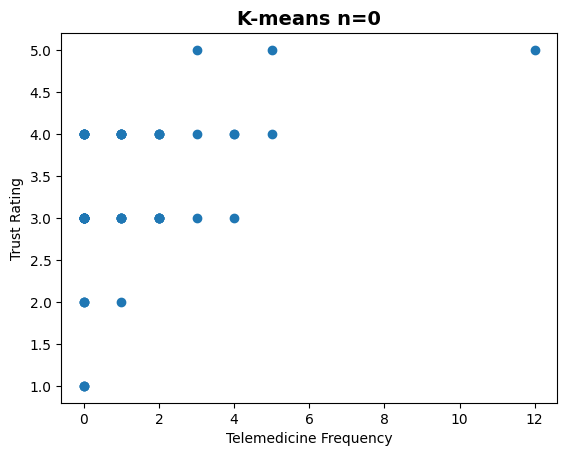

In [ ]:
# Create scatterplot between Q7 and Q9
x = df["q7"]
y = df["q9"]
plt.scatter(x,y)
plt.title('K-means n=0', fontsize = 14, fontweight='bold')
plt.xlabel('Telemedicine Frequency')
plt.ylabel('Trust Rating')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


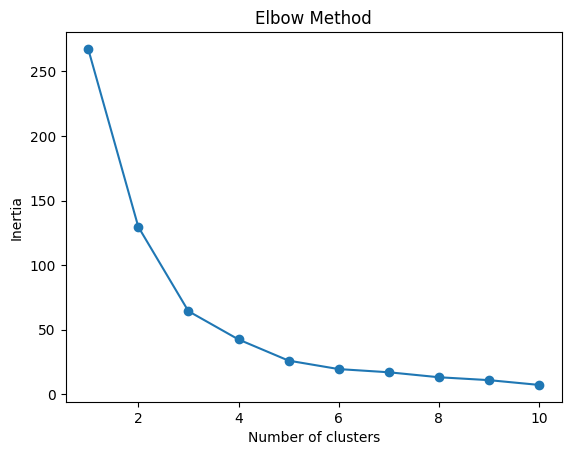

In [ ]:
# Perform the Elbow method to select the appropriate k-clusters
data = list(zip(x,y))
inertias = []

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42 }

for i in range (1,11):
  kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Inertia')

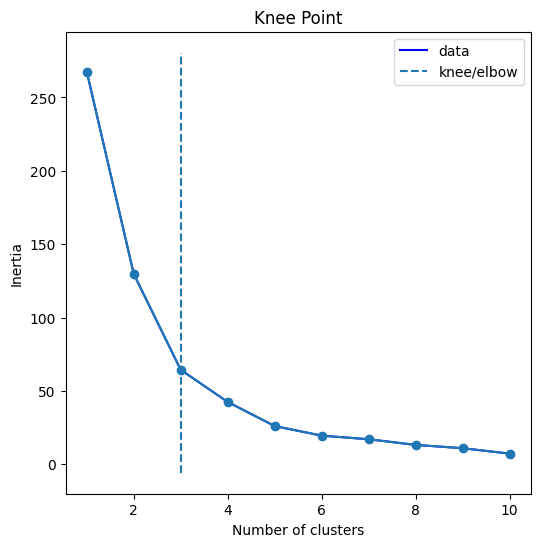

In [ ]:
# Perform the Knee method to supplement the results in the Elbow method
kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
kl.plot_knee()
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Normalized data, normalized knee, and normalized distance curve.
# kl.plot_knee_normalized()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


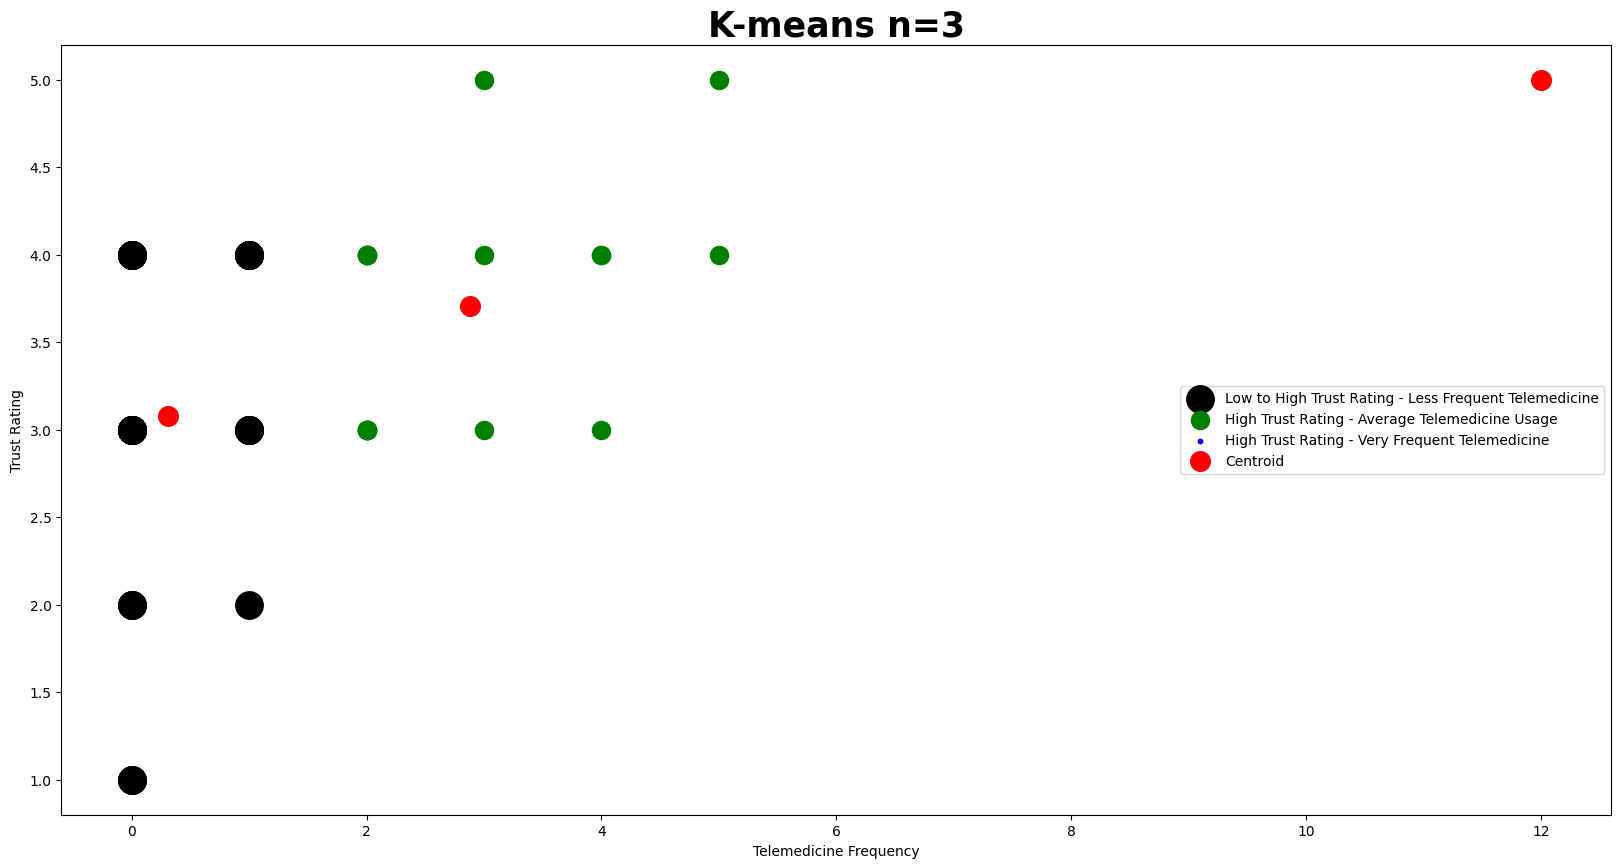

In [ ]:
# Perform a K-Means Clustering Method with K=3 and visualize it in a scatterplot
x = df[["q7","q9"]].values
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = len(y_clusters[y_clusters == 2])*10, c = 'black', label = "Low to High Trust Rating - Less Frequent Telemedicine")
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = len(y_clusters[y_clusters == 0])*10, c = 'green', label = "High Trust Rating - Average Telemedicine Usage")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = len(y_clusters[y_clusters == 1])*10, c = 'blue', label = "High Trust Rating - Very Frequent Telemedicine")

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 200, c = "red", label = "Centroid")
plt.title('K-means n=3', fontsize = 25, fontweight='bold')
plt.xlabel('Telemedicine Frequency')
plt.ylabel('Trust Rating')
plt.legend(loc='center right')
plt.show()